In [1]:
pip install cufflinks

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install plotly

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install kaggle

Note: you may need to restart the kernel to use updated packages.


In [5]:
pip install chart_studio

Note: you may need to restart the kernel to use updated packages.


In [1]:
%matplotlib inline
from IPython.display import Image, HTML
import json
import datetime
import ast
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats
from sklearn.ensemble import GradientBoostingClassifier, GradientBoostingRegressor
from sklearn.dummy import DummyClassifier, DummyRegressor
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier, XGBRegressor
from wordcloud import WordCloud, STOPWORDS
import plotly
import chart_studio
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
import warnings
warnings.filterwarnings('ignore')
chart_studio.tools.set_credentials_file(username='samakshchandra', api_key='9d7732885c2b26559d1c7435c15e62a7')

sns.set_style('whitegrid')
sns.set(font_scale=1.25)
pd.set_option('display.max_colwidth', 50)

# Step 1: Exploratory Data Analysis

In [2]:
path = 'Desktop/ML DATA/movies_metadata.csv'
df = pd.read_csv(path)

In [3]:
df.head().transpose()

,0,1,2,3,4
adult,False,False,False,False,False
belongs_to_collection,"{'id': 10194, 'name': 'Toy Story Collection', ...",NaN,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",NaN,"{'id': 96871, 'name': 'Father of the Bride Col..."
budget,30000000,65000000,0,16000000,0
genres,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...","[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...","[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...","[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...","[{'id': 35, 'name': 'Comedy'}]"
homepage,http://toystory.disney.com/toy-story,NaN,NaN,NaN,NaN
id,862,8844,15602,31357,11862
imdb_id,tt0114709,tt0113497,tt0113228,tt0114885,tt0113041
original_language,en,en,en,en,en
original_title,Toy Story,Jumanji,Grumpier Old Men,Waiting to Exhale,Father of the Bride Part II
overview,"Led by Woody, Andy's toys live happily in his ...",When siblings Judy and Peter discover an encha...,A family wedding reignites the ancient feud be...,"Cheated on, mistreated and stepped on, the wom...",Just when George Banks has recovered from his ...


In [4]:
df.columns

Index(['adult', 'belongs_to_collection', 'budget', 'genres', 'homepage', 'id',
       'imdb_id', 'original_language', 'original_title', 'overview',
       'popularity', 'poster_path', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'video',
       'vote_average', 'vote_count'],
      dtype='object')

In [5]:
df.shape  #this means 45266 rows and 24 columns in the dataframe

(45466, 24)

In [6]:
df.info()   #to gain more insights into the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45466 entries, 0 to 45465
Data columns (total 24 columns):
adult                    45466 non-null object
belongs_to_collection    4494 non-null object
budget                   45466 non-null object
genres                   45466 non-null object
homepage                 7782 non-null object
id                       45466 non-null object
imdb_id                  45449 non-null object
original_language        45455 non-null object
original_title           45466 non-null object
overview                 44512 non-null object
popularity               45461 non-null object
poster_path              45080 non-null object
production_companies     45463 non-null object
production_countries     45463 non-null object
release_date             45379 non-null object
revenue                  45460 non-null float64
runtime                  45203 non-null float64
spoken_languages         45460 non-null object
status                   45379 non-null objec

### There are a total of 45466 movies with 24 features. Most of the features have very few NaN values excepting homepage and tagline. We will try to clean this dataset to a form suitable for analysis. Next step is to perform data wrangling on the dataset.

# Step 2: Data Wrangling

In [7]:
#dropping the features that are no useful information to us
df = df.drop(['imdb_id'],axis=1)

In [8]:
df[df['original_title'] != df['title']][['title','original_title']].head()

,title,original_title
28,The City of Lost Children,La Cité des Enfants Perdus
29,Shanghai Triad,摇啊摇，摇到外婆桥
32,Wings of Courage,"Guillaumet, les ailes du courage"
57,The Postman,Il postino
58,The Confessional,Le confessionnal


In [9]:
#we can deduce if the movie is a foreign language film(not made in English originally) by looking at the original_language
#column, hence we can drop the original_title column without any loss of critical information

df = df.drop(['original_title'],axis=1)

In [10]:
df[df['revenue'] == 0].shape #although recorded revenue for most movies is 0, still this can be used as an important feature

(38052, 22)

In [11]:
df[['revenue']] = df[['revenue']].replace(0,np.nan)

In [12]:
df['budget'] = pd.to_numeric(df['budget'], errors='coerce') #budget has some unclean values that makes pandas assign it as a generic object. Converted into a numeric variable.
df['budget'] = df['budget'].replace(0,np.nan)
df[df['budget'].isnull()].shape

(36576, 22)

In [13]:
#to make the data more insightful we will introduce and create two features
#year: The year in which the movie was released
#return: The ratio of revenue to budget, this feature is important because right now our data will not be able to tell if a
#$200 million budget movie which earned $100 million did better than a $50,000 budget movie earning $200,000.

#A revenue greater than 1 would indicate a profit whereas less than 1 would indicate a loss

df['return'] = df['revenue']/df['budget']
df[df['return'].isnull()].shape

(40085, 23)

In [14]:
df['year'] = pd.to_datetime(df['release_date'],errors='coerce').apply(lambda x:str(x).split('-')[0] if x!=np.nan else np.nan)

In [15]:
df['adult'].value_counts()

False                                                                                                                             45454
True                                                                                                                                  9
 Rune Balot goes to a casino connected to the October corporation to try to wrap up her case once and for all.                        1
 Avalanche Sharks tells the story of a bikini contest that turns into a horrifying affair when it is hit by a shark avalanche.        1
 - Written by Ørnås                                                                                                                   1
Name: adult, dtype: int64

In [16]:
#there are close to zero adult movies in this dataset, also the adult feature is not of much use to us then. Hence it can be safely dropped

df = df.drop('adult',axis=1)

In [17]:
df.shape

(45466, 23)

In [18]:
base_poster_url = 'http://image.tmdb.org/t/p/w185/'
df['poster_path'] = "<img src='" + base_poster_url + df['poster_path'] + "' style='height:100px;'>"

#### Title and Overview Wordclouds 
##### Are there some words that figure more often in movie titles?

In [19]:
df['title'] = df['title'].astype('str')
df['overview'] = df['overview'].astype('str')

In [20]:
title_corpus = ' '.join(df['title'])
overview_corpus = ' '.join(df['overview'])

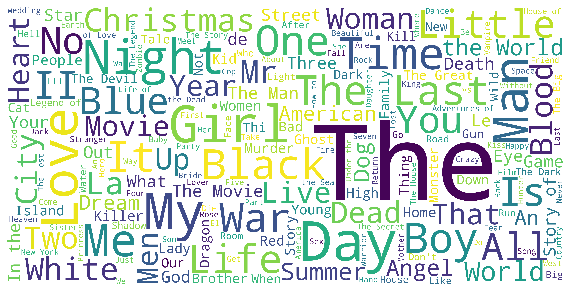

In [21]:
title_wordcloud = WordCloud(stopwords = STOPWORDS,background_color ='white',height=2000,width=4000).generate(title_corpus)
plt.figure(figsize=(10,8))
plt.imshow(title_wordcloud)
plt.axis('off')
plt.show()

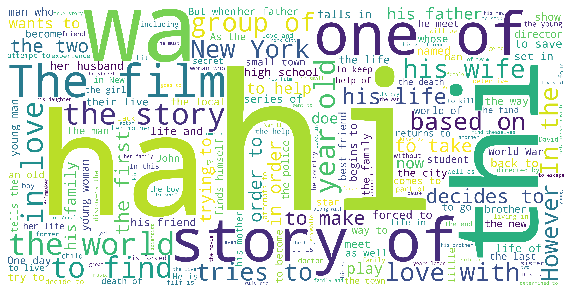

In [22]:
overview_wordcloud = WordCloud(stopwords = STOPWORDS,background_color='white',height=2000,width=4000).generate(overview_corpus)
plt.figure(figsize=(10,8))
plt.imshow(overview_wordcloud)
plt.axis('off')
plt.show()

##### Production Countries

In [23]:
df['production_countries'] = df['production_countries'].fillna('[]').apply(ast.literal_eval)
df['production_countries'] = df['production_countries'].apply(lambda x:[i['name'] for i in x] if isinstance(x,list) else [])

In [24]:
s = df.apply(lambda x: pd.Series(x['production_countries']),axis=1).stack().reset_index(level=1,drop=True)
s.name = 'countries'

In [25]:
con_df = df.drop('production_countries',axis=1).join(s)
con_df = pd.DataFrame(con_df['countries'].value_counts())
con_df['country'] = con_df.index
con_df.columns = ['num-movies','country']
con_df = con_df.reset_index().drop('index',axis=1)
con_df.head(10)

,num-movies,country
0,21153,United States of America
1,4094,United Kingdom
2,3940,France
3,2254,Germany
4,2169,Italy
5,1765,Canada
6,1648,Japan
7,964,Spain
8,912,Russia
9,828,India


In [26]:
con_df = con_df[con_df['country'] != 'United States of America']

In [27]:
data = [dict(
        type = 'choropleth',
        locations = con_df['country'],
        locationmode = 'country names',
        z = con_df['num-movies'],
        text = con_df['country'],
        colorscale = [[0,'rgb(255, 255, 255)'],[1,'rgb(255, 0, 0)']],
        autocolorscale = False,
        reversescale = False,
        marker = dict(
            line = dict(
                color = 'rgb(180,180,180)',
                width = 0.5
            )),
        colorbar = dict(
            autopick = False,
            tickprefix = '',
            title = 'Production Countries'),
        )]

layout = dict(
    title = 'Production Countries for the MovieLens Movies (Apart from US)',
    geo = dict(
        showframe = False,
        showcoastlines = False,
        projection = dict(
            type = 'Mercator'
        )
    )
)

fig = dict(data = data, layout = layout)
py.iplot(fig, validate = False, filename = 'd3-world-map')

##### Franchise Movies

In [28]:
#let us discover the longest running and the most successful franchises

df_fran = df[df['belongs_to_collection'].notnull()]
df_fran['belongs_to_collection'] = df_fran['belongs_to_collection'].apply(ast.literal_eval).apply(lambda x: x['name'] if isinstance(x,dict) else np.nan)

df_fran = df_fran[df_fran['belongs_to_collection'].notnull()]

In [29]:
fran_pivot = df_fran.pivot_table(index = 'belongs_to_collection', values = 'revenue', aggfunc = {'revenue' : ['mean', 'sum', 'count']}).reset_index()

##### highest grossing movie franchises

In [30]:
fran_pivot.sort_values('sum',ascending = False).head(10)

,belongs_to_collection,count,mean,sum
552,Harry Potter Collection,8,9.634209e+08,7.707367e+09
1160,Star Wars Collection,8,9.293118e+08,7.434495e+09
646,James Bond Collection,26,2.733450e+08,7.106970e+09
1317,The Fast and the Furious Collection,8,6.406373e+08,5.125099e+09
968,Pirates of the Caribbean Collection,5,9.043154e+08,4.521577e+09
1550,Transformers Collection,5,8.732202e+08,4.366101e+09
325,Despicable Me Collection,4,9.227676e+08,3.691070e+09
1491,The Twilight Collection,5,6.684215e+08,3.342107e+09
610,Ice Age Collection,5,6.433417e+08,3.216709e+09
666,Jurassic Park Collection,4,7.578710e+08,3.031484e+09


##### Most successful movie franchise (by average gross)

In [31]:
fran_pivot.sort_values('mean',ascending = False).head(10)  #not a very powerful metric but no harm in exploring this

,belongs_to_collection,count,mean,sum
112,Avatar Collection,1,2.787965e+09,2.787965e+09
1245,The Avengers Collection,2,1.462481e+09,2.924962e+09
479,Frozen Collection,1,1.274219e+09,1.274219e+09
446,Finding Nemo Collection,2,9.844532e+08,1.968906e+09
1352,The Hobbit Collection,3,9.785078e+08,2.935523e+09
1388,The Lord of the Rings Collection,3,9.721816e+08,2.916545e+09
552,Harry Potter Collection,8,9.634209e+08,7.707367e+09
1160,Star Wars Collection,8,9.293118e+08,7.434495e+09
325,Despicable Me Collection,4,9.227676e+08,3.691070e+09
968,Pirates of the Caribbean Collection,5,9.043154e+08,4.521577e+09


##### Longest running franchises

In [32]:
fran_pivot.sort_values('count',ascending=False).head(10)

,belongs_to_collection,count,mean,sum
646,James Bond Collection,26,2.733450e+08,7.106970e+09
473,Friday the 13th Collection,12,3.874155e+07,4.648985e+08
976,Pokémon Collection,11,6.348189e+07,6.983008e+08
552,Harry Potter Collection,8,9.634209e+08,7.707367e+09
540,Halloween Collection,8,3.089601e+07,2.471681e+08
29,A Nightmare on Elm Street Collection,8,4.544894e+07,3.635916e+08
1317,The Fast and the Furious Collection,8,6.406373e+08,5.125099e+09
1432,The Pink Panther (Original) Collection,8,2.055978e+07,1.644782e+08
1160,Star Wars Collection,8,9.293118e+08,7.434495e+09
977,Police Academy Collection,7,4.352046e+07,3.046432e+08


##### Production Countries

In [33]:
df['production_companies'] = df['production_companies'].fillna('[]').apply(ast.literal_eval)
df['production_companies'] = df['production_companies'].apply(lambda x: [i['name'] for i in x] if isinstance(x,list) else [])

In [34]:
s = df.apply(lambda x : pd.Series(x['production_companies']), axis=1).stack().reset_index(level = 1, drop=True)
s.name = 'companies'

In [35]:
com_df = df.drop('production_companies',axis=1).join(s)

In [36]:
com_sum = pd.DataFrame(com_df.groupby('companies')['revenue'].sum().sort_values(ascending=False))
com_sum.columns = ['Total']
com_mean = pd.DataFrame(com_df.groupby('companies')['revenue'].mean().sort_values(ascending=False))
com_mean.columns = ['Average']
com_count = pd.DataFrame(com_df.groupby('companies')['revenue'].count().sort_values(ascending=False))
com_count.columns = ['Number']

com_pivot = pd.concat((com_sum,com_mean,com_count),axis=1)

In [37]:
#lets find out which production companies make the most money from the movie-making business
com_pivot.sort_values('Total',ascending=False).head(10)

,Total,Average,Number
Warner Bros.,6.352519e+10,1.293792e+08,491
Universal Pictures,5.525919e+10,1.193503e+08,463
Paramount Pictures,4.880819e+10,1.235650e+08,395
Twentieth Century Fox Film Corporation,4.768775e+10,1.398468e+08,341
Walt Disney Pictures,4.083727e+10,2.778046e+08,147
Columbia Pictures,3.227974e+10,1.367785e+08,236
New Line Cinema,2.217339e+10,1.119868e+08,198
Amblin Entertainment,1.734372e+10,2.550547e+08,68
DreamWorks SKG,1.547575e+10,1.984071e+08,78
Dune Entertainment,1.500379e+10,2.419966e+08,62


In [38]:
com_pivot[com_pivot['Number']>=15].sort_values('Average',ascending=False).head(10)  #these are the most successful production companies

,Total,Average,Number
Pixar Animation Studios,1.118853e+10,6.215852e+08,18
Marvel Studios,1.169964e+10,6.157703e+08,19
Revolution Sun Studios,8.120339e+09,5.413559e+08,15
Lucasfilm,9.898421e+09,4.499282e+08,22
DreamWorks Animation,1.370752e+10,4.031622e+08,34
DC Entertainment,6.212609e+09,3.882880e+08,16
Dentsu,6.853205e+09,3.807336e+08,18
Jerry Bruckheimer Films,8.957441e+09,3.732267e+08,24
Marvel Enterprises,6.538067e+09,3.441088e+08,19
Legendary Pictures,1.346866e+10,3.367166e+08,40


##### Original Language

In [39]:
df['original_language'].drop_duplicates().shape[0]

93

In [40]:
lang_df = pd.DataFrame(df['original_language'].value_counts())
lang_df['language'] = lang_df.index
lang_df.columns = ['number','language']
lang_df.head(10)

,number,language
en,32269,en
fr,2438,fr
it,1529,it
ja,1350,ja
de,1080,de
es,994,es
ru,826,ru
hi,508,hi
ko,444,ko
zh,409,zh


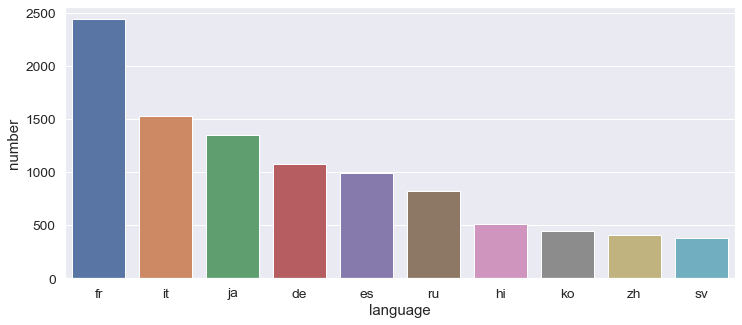

Text(0, 0.5, 'Number')

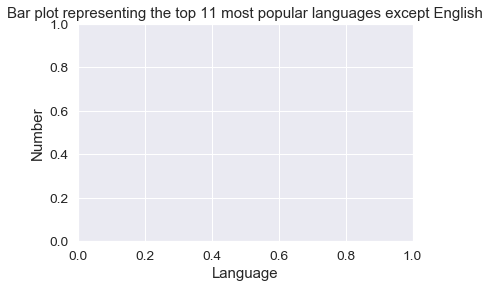

In [41]:
#let us represent the most popular languages in the form of a bar plot
plt.figure(figsize=(12,5))
sns.barplot(x='language',y='number',data=lang_df.iloc[1:11])
plt.show()
plt.title('Bar plot representing the top 11 most popular languages except English')
plt.xlabel('Language')
plt.ylabel('Number')

##### Popularity, Vote Average and Vote Count

In [42]:
#we will work with the metrics provided by the TMDB users. We will try to gain a deeper understanding of the popularity
#vote average and vote count and try to deduce any relationship if exists between the three as well as other numeric features
#such as budget and revenue

def clean_numeric(x):
    try:
        return float(x)
    except:
        return np.nan

In [43]:
df['popularity'] = df['popularity'].apply(clean_numeric).astype('float')
df['vote_average'] = df['vote_average'].apply(clean_numeric).astype('float')
df['vote_count'] = df['vote_count'].apply(clean_numeric).astype('float')

In [44]:
df['popularity'].describe()

count    45460.000000
mean         2.921478
std          6.005414
min          0.000000
25%          0.385948
50%          1.127685
75%          3.678902
max        547.488298
Name: popularity, dtype: float64

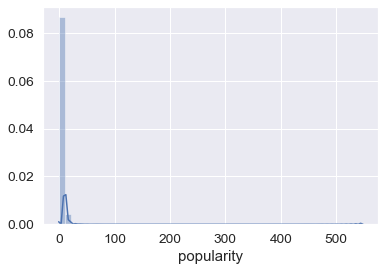

In [45]:
sns.distplot(df['popularity'].fillna(df['popularity'].median()))
plt.show()

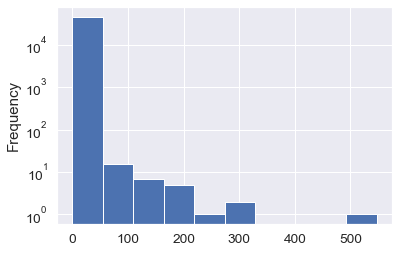

In [46]:
df['popularity'].plot(logy=True,kind='hist')

In [47]:
df[['popularity','title','year']].sort_values('popularity',ascending=False).head(10)

,popularity,title,year
30700,547.488298,Minions,2015
33356,294.337037,Wonder Woman,2017
42222,287.253654,Beauty and the Beast,2017
43644,228.032744,Baby Driver,2017
24455,213.849907,Big Hero 6,2014
26564,187.860492,Deadpool,2016
26566,185.330992,Guardians of the Galaxy Vol. 2,2017
14551,185.070892,Avatar,2009
24351,183.870374,John Wick,2014
23675,154.801009,Gone Girl,2014


##### Vote count - Number of votes given to movies by users

In [48]:
df['vote_count'].describe()

count    45460.000000
mean       109.897338
std        491.310374
min          0.000000
25%          3.000000
50%         10.000000
75%         34.000000
max      14075.000000
Name: vote_count, dtype: float64

###### Most Voted on Movies

In [49]:
df[['title','vote_count','year']].sort_values('vote_count',ascending=False).head(10)

,title,vote_count,year
15480,Inception,14075.0,2010
12481,The Dark Knight,12269.0,2008
14551,Avatar,12114.0,2009
17818,The Avengers,12000.0,2012
26564,Deadpool,11444.0,2016
22879,Interstellar,11187.0,2014
20051,Django Unchained,10297.0,2012
23753,Guardians of the Galaxy,10014.0,2014
2843,Fight Club,9678.0,1999
18244,The Hunger Games,9634.0,2012


In [50]:
df['vote_average'] = df['vote_average'].replace(0,np.nan)
df['vote_average'].describe()

count    42462.000000
mean         6.014877
std          1.256208
min          0.500000
25%          5.300000
50%          6.100000
75%          6.900000
max         10.000000
Name: vote_average, dtype: float64

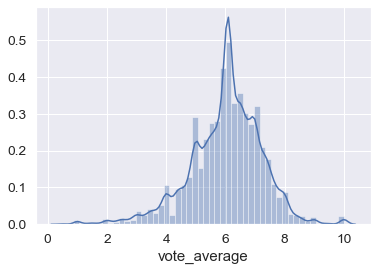

In [51]:
sns.distplot(df['vote_average'].fillna(df['vote_average'].median()))

###### It appears TMDB users are vert strict in their ratings. The mean rating is only a 6 on a scale of 10. Half the movies have a rating equal to or less than 6.

##### Most Critically Acclaimed Movies

In [52]:
df[df['vote_count']>2000][['title','vote_average','vote_count','year']].sort_values('vote_average',ascending=False).head(10)

,title,vote_average,vote_count,year
314,The Shawshank Redemption,8.5,8358.0,1994
834,The Godfather,8.5,6024.0,1972
2211,Life Is Beautiful,8.3,3643.0,1997
5481,Spirited Away,8.3,3968.0,2001
1152,One Flew Over the Cuckoo's Nest,8.3,3001.0,1975
1176,Psycho,8.3,2405.0,1960
2843,Fight Club,8.3,9678.0,1999
1178,The Godfather: Part II,8.3,3418.0,1974
12481,The Dark Knight,8.3,12269.0,2008
292,Pulp Fiction,8.3,8670.0,1994


###### Do popularity and vote average share a tangible relationship? In other words, is there a strong positive correlation between these two quantities? Let us visualize their relationship in the form of a scatter plot.

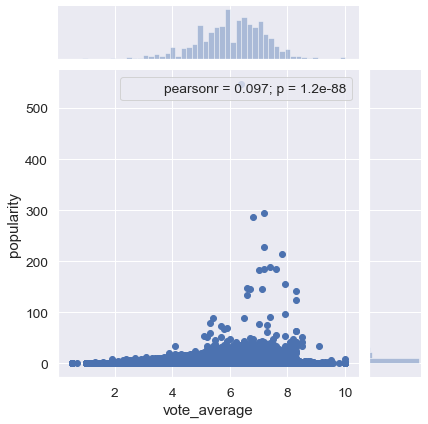

In [53]:
sns.jointplot(x='vote_average',y='popularity',data=df,stat_func = stats.pearsonr)

In [54]:
#let us calculate the pearson coefficient 
pearsoncorr = df[['vote_average','popularity']].corr(method='pearson')

pearsoncorr #since the pearson coefficient is very small 0.0966, so it is safe to conclude that there is very little positve correlation between vote average and popularity

,vote_average,popularity
vote_average,1.000000,0.096644
popularity,0.096644,1.000000


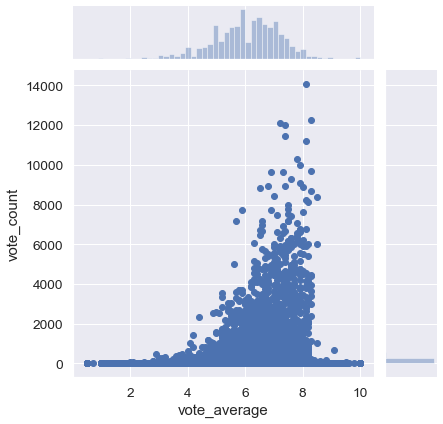

In [55]:
sns.jointplot(x='vote_average',y='vote_count',data=df)

In [56]:
#let us calculate pearson coefficient again between vote average and vote count to detect strength of correlation
pearsoncorr1 = df[['vote_average','vote_count']].corr(method='pearson')

pearsoncorr1

,vote_average,vote_count
vote_average,1.000000,0.123096
vote_count,0.123096,1.000000


###### There is very little correlation between these two features. This means that a large number of votes on a particular movie does not necessarily imply that the movie is good.

##### Movie Release Dates

In [57]:
#we have already created an 'year' feature in our preliminary data wrangling step. Now lets extract the month and day too for each movie

month_order = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
day_order = ['Mon','Tue','Wed','Thu','Fri','Sat','Sun']

In [58]:
def get_month(x):
    try:
        return month_order[int(str(x).split('-')[1])-1]
    except:
        return np.nan

In [59]:
def get_day(x):
    try:
        year,month,day = (int(i) for i in x.split('-'))
        answer = datetime.date(year,month,day).weekday()
        return day_order[answer]
    except:
        return np.nan

In [60]:
df['day'] = df['release_date'].apply(get_day)
df['month'] = df['release_date'].apply(get_month)

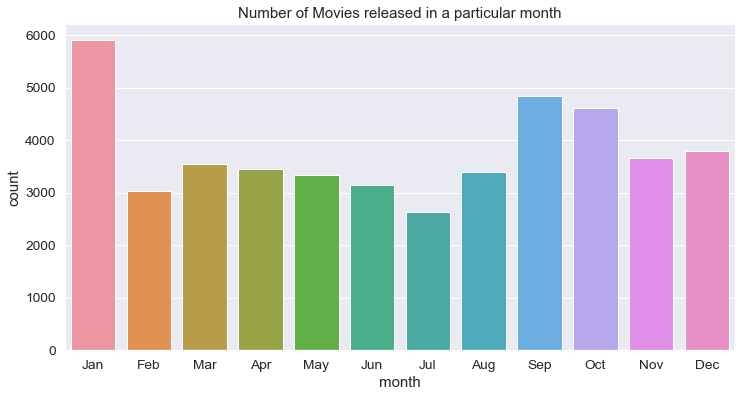

In [61]:
#with these features in hand, let us now check the most popular and the most successful months and days
plt.figure(figsize=(12,6))
plt.title('Number of Movies released in a particular month')
sns.countplot(x='month',data=df,order=month_order)

##### In which months do blockbuster movies release?

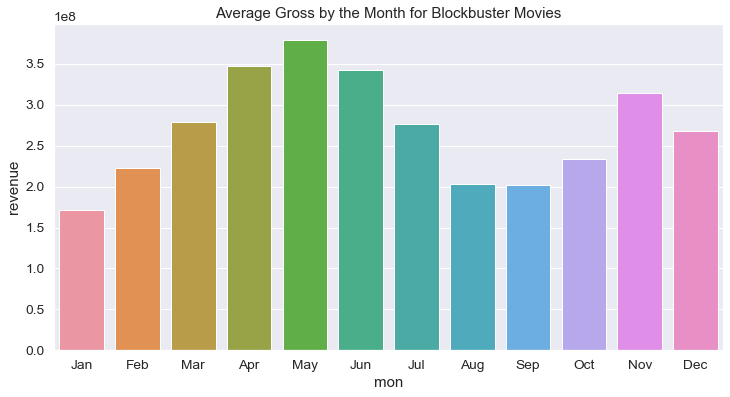

In [62]:
month_mean = pd.DataFrame(df[df['revenue']> 1e8].groupby('month')['revenue'].mean())
month_mean['mon'] = month_mean.index
plt.figure(figsize=(12,6))
plt.title('Average Gross by the Month for Blockbuster Movies')
sns.barplot(x='mon',y='revenue',data=month_mean,order=month_order)

##### Do some months tend to be more successful than others? Let us visualize a box plot between return and month

(0, 12)

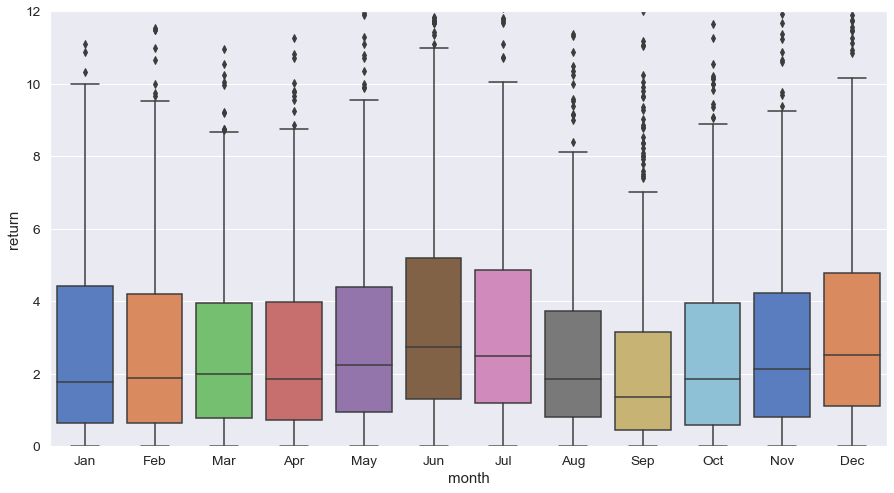

In [63]:
fig, ax = plt.subplots(nrows=1,ncols=1,figsize=(15,8))
sns.boxplot(x='month',y='return',data=df[df['return'].notnull()], palette = 'muted', ax=ax,order=month_order)
ax.set_ylim([0,12])

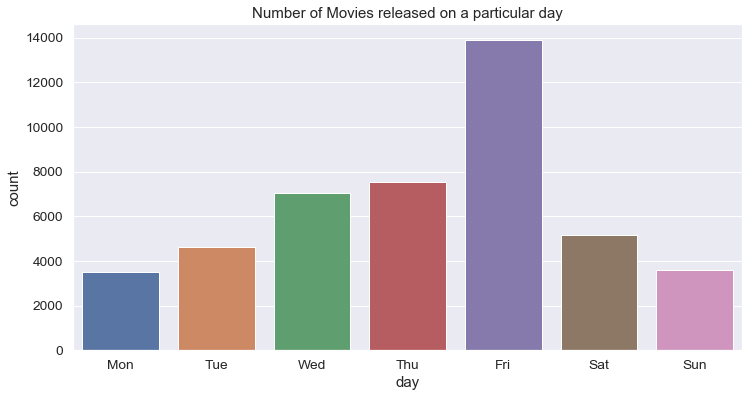

In [64]:
#June and July tend to yield the highest returns. September is the lowest. This is mainly because June and July are months of summer vacations and september is mostly exam time or the beginning of new semester for students
#let us now have a look at the most popular days as we did for months

plt.figure(figsize=(12,6))
plt.title('Number of Movies released on a particular day')
sns.countplot(x='day',data=df,order=day_order)

In [65]:
#friday is the most popular day for movie releases. This can be attributed to the fact that it is the start of weekend

##### Number of movies by the year

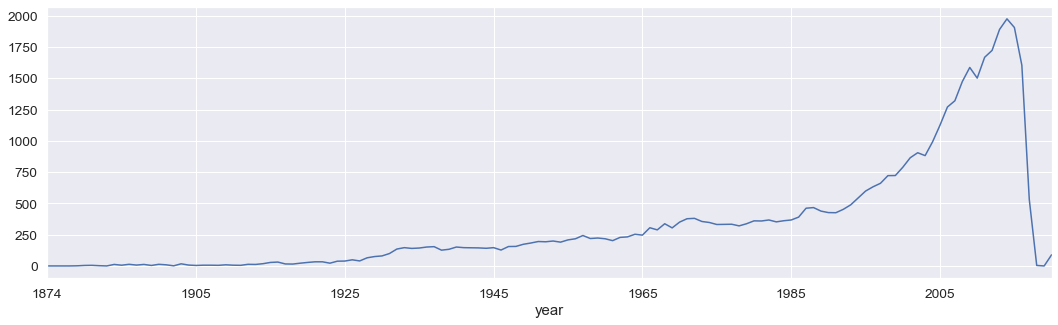

In [66]:
year_count = df.groupby('year')['title'].count()
plt.figure(figsize=(18,5))
year_count.plot()

In [67]:
#we notice that there has been a sharp rise in the production of movies in the 1990's decade. However, we will not look much 
#into this aspect as it is entirely possible that recent movies were oversampled for the purposes of this dataset.

##### Earliest Movies Represented in the Dataset

In [68]:
df[df['year'] != 'NaT'][['title','year']].sort_values('year').head(10)

,title,year
34940,Passage of Venus,1874
34937,Sallie Gardner at a Gallop,1878
41602,Buffalo Running,1883
34933,Man Walking Around a Corner,1887
34934,Accordion Player,1888
34938,Traffic Crossing Leeds Bridge,1888
34936,"Monkeyshines, No. 2",1890
34939,London's Trafalgar Square,1890
34935,"Monkeyshines, No. 1",1890
41194,Mosquinha,1890


In [69]:
#let us create a heatmap indicating movies and year for all movies released in this century. This will give us a good idea of
#the hot and cold months for movie buffs

months = {'Jan':1,'Feb':2,'Mar':3,'Apr':4,'May':5,'Jun':6,'Jul':7,'Aug':8,'Sep':9,'Oct':10,'Nov':11,'Dec':12}

In [70]:
df_21 = df.copy()
df_21['year'] = df_21[df_21['year'] != 'NaT']['year'].astype(int)
df_21[df_21['year']>=2000]
hmap_21 = pd.pivot_table(data=df_21,index='month',columns='year',aggfunc='count',values='title')
hmap_21 = hmap_21.fillna(0)

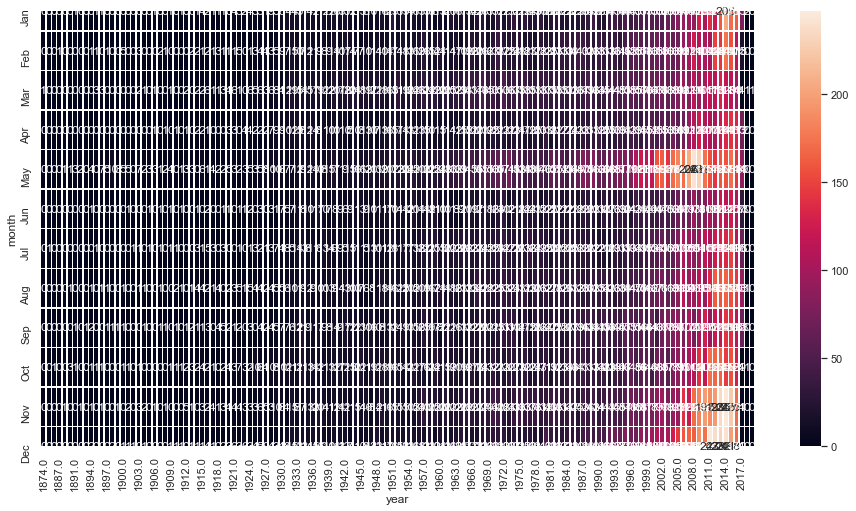

In [71]:
sns.set(font_scale=1)
f, ax = plt.subplots(figsize=(16,8))
sns.heatmap(hmap_21,annot=True,linewidths=.5,ax=ax,fmt='n',yticklabels=month_order)

In [72]:
sns.set(font_scale=1.25)

##### Movie status -> although not entirely relevant to our analysis, gathering information on the various kinds of movies based on their status of release can provide us interesting insight into on the nature of movies present in our dataset.

In [73]:
df['status'].value_counts()

Released           45014
Rumored              230
Post Production       98
In Production         20
Planned               15
Canceled               2
Name: status, dtype: int64

##### We can see that almost every movie has been released. However, it is interesting to note that movielens has ratings of users on movies which are yet to be released i.e they are still in the planning, production and post-production stages. We might take this information into account when building our collaborative filtering recommendation engine.

#### Spoken Languages

In [74]:
#does the number of spoken languages influence the success of a movie? To do this we will convert the spoken_languages feature
#into a numeric feature indicating the total number of languages spoken in that film

df['spoken_languages'] = df['spoken_languages'].fillna('[]').apply(ast.literal_eval).apply(lambda x: len(x) if isinstance(x,list) else np.nan)

In [75]:
df['spoken_languages'].value_counts().sort_values()

19        1
13        1
12        1
10        1
9         5
8         6
7        14
6        62
5       178
4       550
3      1705
0      3835
2      5371
1     33736
Name: spoken_languages, dtype: int64

##### Let us take a look at the films with more than 10 spoken languages

In [76]:
df[df['spoken_languages']>=10][['title','year','spoken_languages']].sort_values('spoken_languages',ascending=False)

,title,year,spoken_languages
22235,Visions of Europe,2004,19
35288,The Testaments,2000,13
14093,To Each His Own Cinema,2007,12
8789,The Adventures of Picasso,1978,10


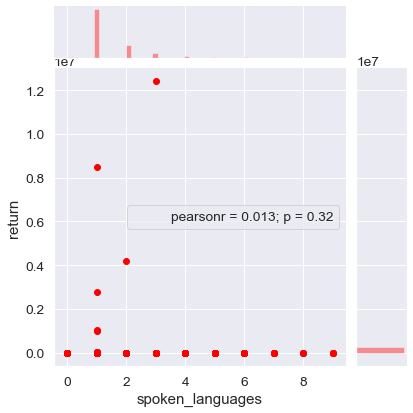

In [77]:
sns.jointplot(x='spoken_languages',y='return',data=df,stat_func=stats.pearsonr,color="red")

##### The pearson's coefficient is 0.013 indicating no correlation between the features spoken languages and return 

##### Runtime -> From the beginning of cinema of 1-minute silent clips to complete 3-hour delights, movies have come a long way. Let us explore the runtime feature to gain some additional insights about the nature of movie lengths and their evolution over time.

In [78]:
df['runtime'].describe()

count    45203.000000
mean        94.128199
std         38.407810
min          0.000000
25%         85.000000
50%         95.000000
75%        107.000000
max       1256.000000
Name: runtime, dtype: float64

##### The average length of movies in this dataset is about 1 hour and 30 minutes. The longest running movie in this dataset is a staggering 1256 minutes (approx 20 hours) long

In [79]:
df['runtime'] = df['runtime'].astype('float')

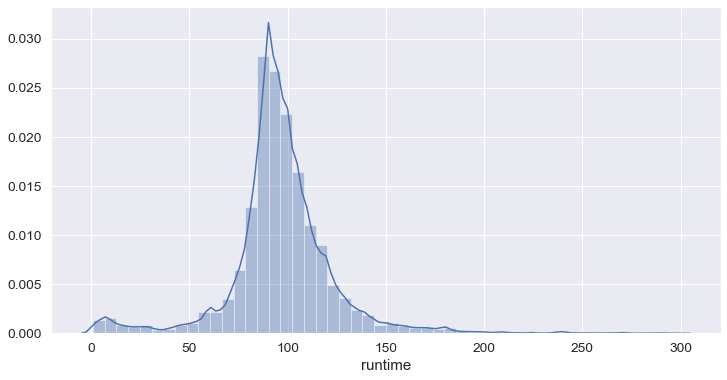

In [80]:
plt.figure(figsize=(12,6))
sns.distplot(df[(df['runtime']<300) & (df['runtime']>0)]['runtime'])

##### Is there any meaningful relationship between runtime and return

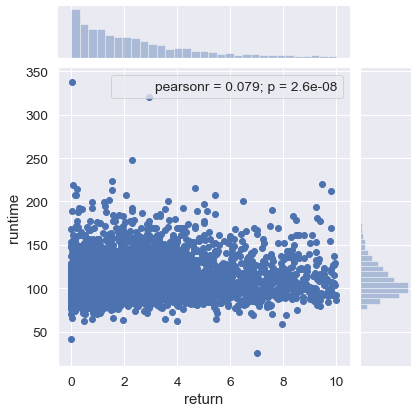

In [81]:
df_mat = df[(df['return'].notnull()) & (df['runtime']>0) & (df['return']<10)]
sns.jointplot('return','runtime',data=df_mat,stat_func = stats.pearsonr)
plt.show()

##### Let us find out the relationship between runtime and budget

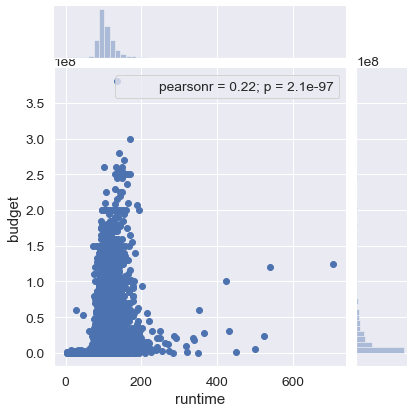

In [82]:
df_mat = df[(df['budget'].notnull()) & (df['runtime']>0)]
sns.jointplot('runtime','budget',data=df_mat,stat_func = stats.pearsonr)
plt.show()

##### The two quantities have a much weaker correlation

##### Average lengths of movies over time

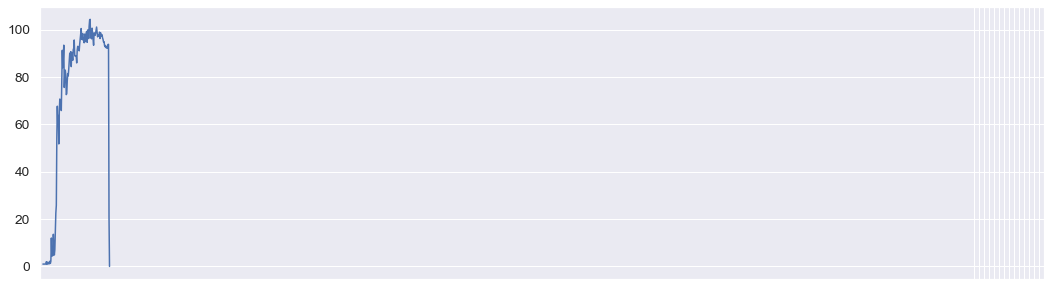

In [83]:
plt.figure(figsize=(18,5))
year_runtime = df[df['year'] != 'NaT'].groupby('year')['runtime'].mean()
plt.plot(year_runtime.index,year_runtime)
plt.xticks(np.arange(1874, 2024, 10.0))
plt.show()

##### Shortest movies

In [84]:
df[df['runtime']>0][['title','year','runtime']].sort_values('runtime').head(10)

,title,year,runtime
35146,La Vague,1891,1.0
36577,Champs de Mars,1900,1.0
36576,Palace of Electricity,1900,1.0
44965,"Luis Martinetti, Contortionist",1894,1.0
42357,A Gathering of Cats,2007,1.0
36575,Eiffel Tower from Trocadero Palace,1900,1.0
36574,Panorama of Eiffel Tower,1900,1.0
44714,The Infernal Caldron,1903,1.0
19244,The Kiss,1896,1.0
44646,The Vanishing Lady,1896,1.0


##### We can see that every film in this list, apart from "A Gathering of Cats", has been filmed in the late 1890's and early 20th century. These all are one-minute in duration. 

##### Longest movies

In [85]:
df[df['runtime']>0][['title','year','runtime']].sort_values('runtime',ascending=False).head(10)

,title,year,runtime
24178,Centennial,1978,1256.0
40938,Baseball,1994,1140.0
19965,Jazz,2001,1140.0
13767,Berlin Alexanderplatz,1980,931.0
13953,Heimat: A Chronicle of Germany,1984,925.0
27855,The Story of Film: An Odyssey,2011,900.0
26682,Taken,2002,877.0
19158,The War,2007,874.0
34667,The Roosevelts: An Intimate History,2014,840.0
34732,Seventeen Moments in Spring,1973,840.0


##### We see that almost all entries in the above chart are TV mini-series. The feature of longest movies will not provide us with much insights into the dataset since it is difficult to distinguish between movies and TV mini-series, unless we do it manually.

##### Budget -> Let us turn our attention to budget, which is an important feature when talking about movie success and revenue.

In [86]:
df['budget'].describe()

count    8.890000e+03
mean     2.160428e+07
std      3.431063e+07
min      1.000000e+00
25%      2.000000e+06
50%      8.000000e+06
75%      2.500000e+07
max      3.800000e+08
Name: budget, dtype: float64

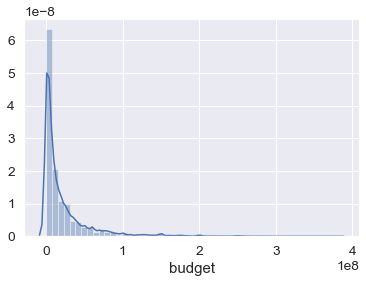

<Figure size 1440x720 with 0 Axes>

In [87]:
sns.distplot(df[df['budget'].notnull()]['budget'])
plt.figure(figsize=(20,10))
plt.show()

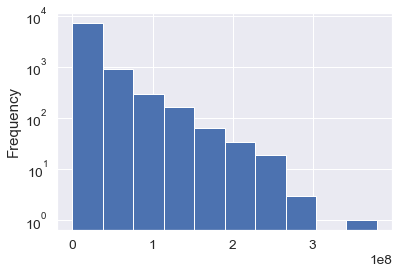

In [88]:
df['budget'].plot(logy=True,kind='hist')

##### The distribution of movie budgets shows an exponential decay. More than 75% of movies have a budget lesser than 25 million dollars. Now, let us look at the most expensive movies of all time and the revenue and returns they generated.

##### Most expensive movies of all time

In [89]:
df[df['budget'].notnull()][['title','year','budget','revenue','return']].sort_values('budget',ascending=False).head(10)

,title,year,budget,revenue,return
17124,Pirates of the Caribbean: On Stranger Tides,2011,380000000.0,1.045714e+09,2.751878
11827,Pirates of the Caribbean: At World's End,2007,300000000.0,9.610000e+08,3.203333
26558,Avengers: Age of Ultron,2015,280000000.0,1.405404e+09,5.019299
11067,Superman Returns,2006,270000000.0,3.910812e+08,1.448449
44842,Transformers: The Last Knight,2017,260000000.0,6.049421e+08,2.326701
16130,Tangled,2010,260000000.0,5.917949e+08,2.276134
18685,John Carter,2012,260000000.0,2.841391e+08,1.092843
11780,Spider-Man 3,2007,258000000.0,8.908716e+08,3.452991
21175,The Lone Ranger,2013,255000000.0,8.928991e+07,0.350157
22059,The Hobbit: The Desolation of Smaug,2013,250000000.0,9.584000e+08,3.833600


##### It can be seen that almost all movies in this chart have made a profit out of their investments, excepting the lone ranger which made less than 35% of its investment. On a 255 million dollar budget, "The Lone Ranger" made only a 90 million dollar revenue. Let us see whether there is a strong correlation between budget and revenue?

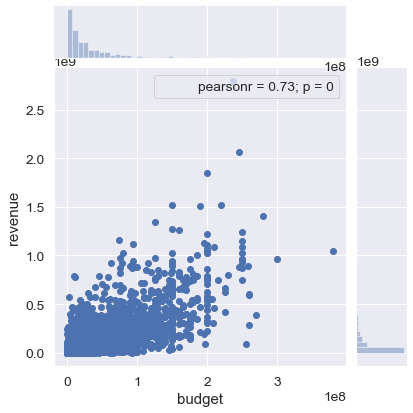

In [90]:
sns.jointplot(x='budget',y='revenue',data=df,stat_func = stats.pearsonr)

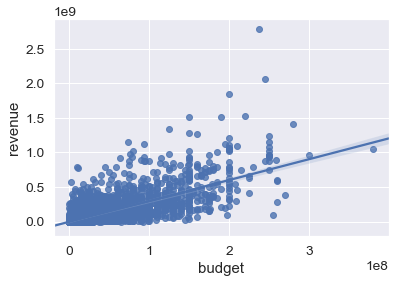

In [91]:
#let us plot a regression line to visualize the correlation between budget and revenue
sns.regplot(x='budget',y='revenue',data=df)

##### With a pearson's coefficient of 0.73 and the regression line showing an upward slope, there is a strong correlation between the budget and revenue features.

#### The final numeric feature we will explore is the revenue. Revenue is the most important quantity associated with the success of a movie.

In [92]:
df['revenue'].describe()

count    7.408000e+03
mean     6.878739e+07
std      1.464203e+08
min      1.000000e+00
25%      2.400000e+06
50%      1.682272e+07
75%      6.722707e+07
max      2.787965e+09
Name: revenue, dtype: float64

##### The maximum revenue for a movie in this dataset is 2.78 billion dollars, whereas the minimum revenue a movie has made in this dataset is just 1 dollar. The median lies around 16.8 million dollars and the mean revenue for all movies is 68.7 million dollars.

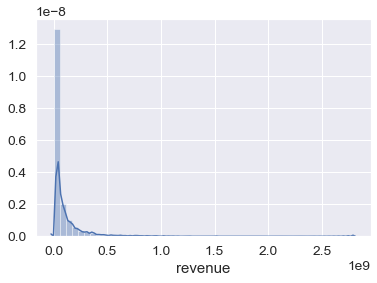

<Figure size 1440x720 with 0 Axes>

In [93]:
sns.distplot(df[df['revenue'].notnull()]['revenue'])
plt.figure(figsize=(20,10))
plt.show()

##### The distribution of revenue also undergoes an exponential decay just like budget. We found that the two quantities are strongly correlated. Let us take a look at the highest and least grossing movies of all time.

##### Highest grossing films of all time

In [94]:
gross_top = df[['poster_path','title','budget','revenue','year']].sort_values('revenue',ascending=False).head(10)
pd.set_option('display.max_colwidth',100)
HTML(gross_top.to_html(escape=False))

,poster_path,title,budget,revenue,year
14551,,Avatar,237000000.0,2.787965e+09,2009
26555,,Star Wars: The Force Awakens,245000000.0,2.068224e+09,2015
1639,,Titanic,200000000.0,1.845034e+09,1997
17818,,The Avengers,220000000.0,1.519558e+09,2012
25084,,Jurassic World,150000000.0,1.513529e+09,2015
28830,,Furious 7,190000000.0,1.506249e+09,2015
26558,,Avengers: Age of Ultron,280000000.0,1.405404e+09,2015
17437,,Harry Potter and the Deathly Hallows: Part 2,125000000.0,1.342000e+09,2011
22110,,Frozen,150000000.0,1.274219e+09,2013
42222,,Beauty and the Beast,160000000.0,1.262886e+09,2017


In [95]:
pd.set_option('display.max_colwidth',50)

TypeError: unsupported operand type(s) for -: 'str' and 'str'

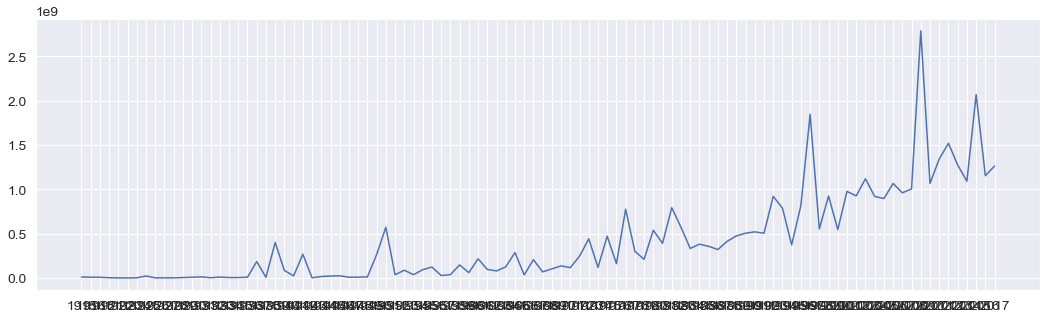

In [96]:
plt.figure(figsize=(18,5))
year_revenue = df[(df['revenue'].notnull()) & (df['year'] != 'NaT')].groupby('year')['revenue'].max()
plt.plot(year_revenue.index,year_revenue)
plt.xticks(np.arange(str(1874),str(2024),10.0))
plt.show()

##### Returns

##### Most successful movies of all time

In [97]:
df[(df['return'].notnull()) & (df['budget'] > 5e6)][['title','budget','revenue','return','year']].sort_values('return',ascending=False).head(10)

,title,budget,revenue,return,year
1065,E.T. the Extra-Terrestrial,10500000.0,792965326.0,75.520507,1982
256,Star Wars,11000000.0,775398007.0,70.490728,1977
1338,Jaws,7000000.0,470654000.0,67.236286,1975
1888,The Exorcist,8000000.0,441306145.0,55.163268,1973
352,Four Weddings and a Funeral,6000000.0,254700832.0,42.450139,1994
834,The Godfather,6000000.0,245066411.0,40.844402,1972
4492,Look Who's Talking,7500000.0,296000000.0,39.466667,1989
24258,Annabelle,6500000.0,255273813.0,39.272894,2014
1056,Dirty Dancing,6000000.0,213954274.0,35.659046,1987
1006,The Sound of Music,8200000.0,286214286.0,34.904181,1965


##### Worst box office disasters

In [98]:
df[(df['return'].notnull()) & (df['budget']>5e6) & (df['revenue']>10000)][['title','budget','revenue','return','year']].sort_values('return').head(10)

,title,budget,revenue,return,year
11159,Chaos,20000000.0,10289.0,0.000514,2005
19027,5 Days of War,20000000.0,17479.0,0.000874,2011
21034,Special Forces,10000000.0,10759.0,0.001076,2011
25732,Foodfight!,65000000.0,73706.0,0.001134,2012
38388,Term Life,16500000.0,21256.0,0.001288,2016
19505,Laurence Anyways,9500000.0,12250.0,0.001289,2012
12038,The Good Night,15000000.0,20380.0,0.001359,2007
3966,Cherry 2000,10000000.0,14000.0,0.001400,1987
22097,Twice Born,13000000.0,18295.0,0.001407,2012
5651,All The Queen's Men,15000000.0,23000.0,0.001533,2001


In [99]:
df['year'] = df['year'].replace('NaT',np.nan)

In [100]:
df['year'] = df['year'].apply(clean_numeric)

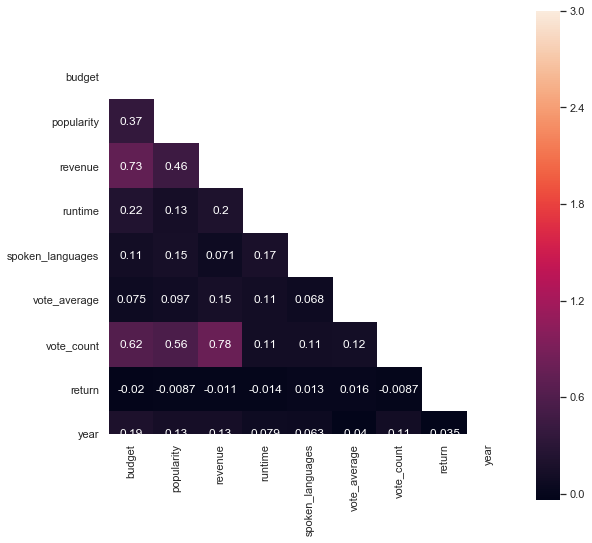

In [101]:
sns.set(font_scale=1)
corr = df.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    plt.figure(figsize=(9,9))
    ax = sns.heatmap(corr,mask=mask,vmax=3,square = True, annot = True)

In [102]:
sns.set(font_scale=1.25)

### Genres

In [103]:
df['genres'] = df['genres'].fillna('[]').apply(ast.literal_eval).apply(lambda x:[i['name'] for i in x] if isinstance(x,list) else [])

In [104]:
s = df.apply(lambda x:pd.Series(x['genres']),axis=1).stack().reset_index(level=1,drop=True)
s.name = 'genre'

In [105]:
gen_df = df.drop('genres',axis=1).join(s)

In [106]:
gen_df['genre'].value_counts().shape[0]

32

##### TMDB defines 32 different genres in our dataset of 45,000 movies. Let us now have a look at the most commonly occuring genres in our movies.

In [107]:
pop_gen = pd.DataFrame(gen_df['genre'].value_counts()).reset_index()
pop_gen.columns = ['genre','movies']
pop_gen.head(10)

,genre,movies
0,Drama,20265
1,Comedy,13182
2,Thriller,7624
3,Romance,6735
4,Action,6596
5,Horror,4673
6,Crime,4307
7,Documentary,3932
8,Adventure,3496
9,Science Fiction,3049


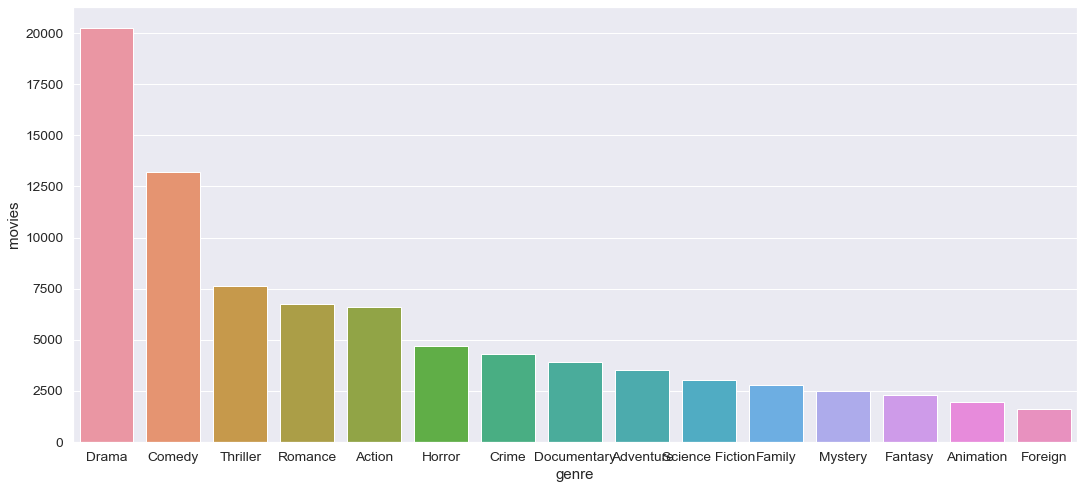

In [108]:
plt.figure(figsize=(18,8))
sns.barplot(x='genre',y='movies',data=pop_gen.head(15))
plt.show()

##### The next question I want to answer is the trends in the share of genres of movies across the world. Has the demand for Science Fiction movies increased? Do certain years have a disproportionate share of Animation Movies? We will only be looking at trends starting 2000. We will consider only those themes that appear in the top 15 most popular genres. We will exclude Documentaries, Family and Foreign Movies from our analysis.

In [109]:
genres = ['Drama','Comedy','Thriller','Romance','Action','Horror','Crime','Adventure','Science Fiction','Mystery','Fantasy','Animation']

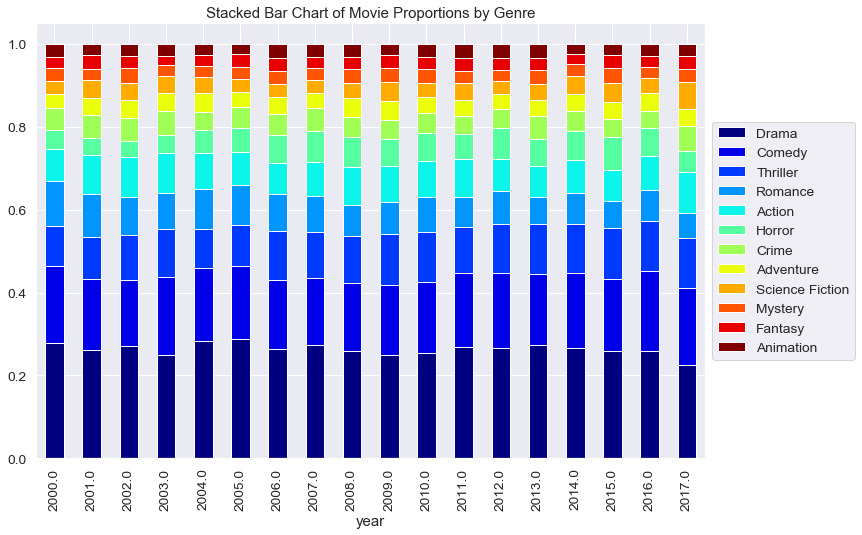

In [110]:
pop_gen_movies = gen_df[(gen_df['genre'].isin(genres)) & (gen_df['year']>=2000) & (gen_df['year']<=2017)]
ctab = pd.crosstab([pop_gen_movies['year']],pop_gen_movies['genre']).apply(lambda x:x/x.sum(),axis=1)
ctab[genres].plot(kind='bar',stacked=True,colormap = 'jet',figsize = (12,8)).legend(loc='center left',bbox_to_anchor=(1,0.5))
plt.title('Stacked Bar Chart of Movie Proportions by Genre')
plt.show()

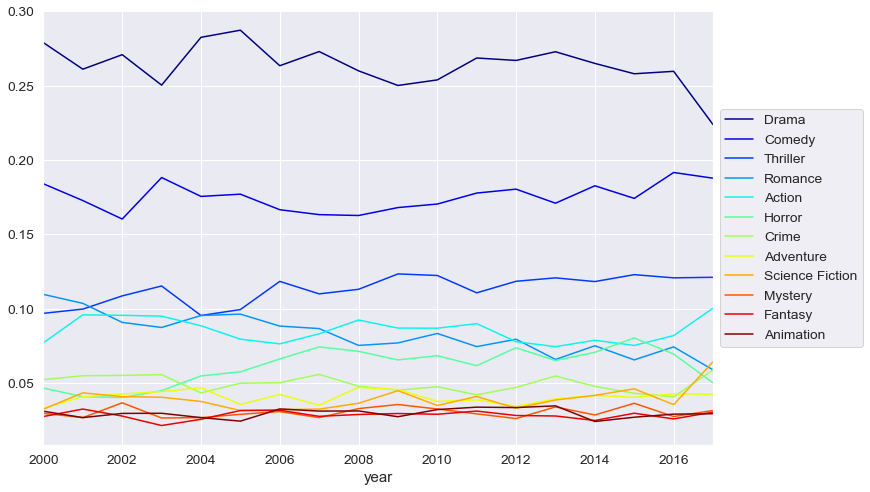

In [111]:
ctab[genres].plot(kind='line',stacked=False,colormap='jet',figsize=(12,8)).legend(loc='center left',bbox_to_anchor=(1,0.5))
plt.show()

##### The proportion of movies of each genre has remained fairly constant since the beginning of this century except for Drama. The proportion of drama films has fallen by over 5%. Thriller movies have enjoyed a slight increase in their share.

##### One question to ask here is that if some genres are particularly more successful than others. For example, we should expect Science Fiction and Fantasy Movies to bring in more revenue than other genres but when normalized with their budget, do they prove to be as successful? We will visualize two violin plots to answer this question. One will be genres versus the revenue while the other will be versus returns.

In [112]:
violin_genres = ['Drama','Comedy','Thriller','Romance','Action','Horror','Crime','Science Fiction','Fantasy','Animation']
violin_movies = gen_df[(gen_df['genre'].isin(violin_genres))]

<Figure size 1296x576 with 0 Axes>

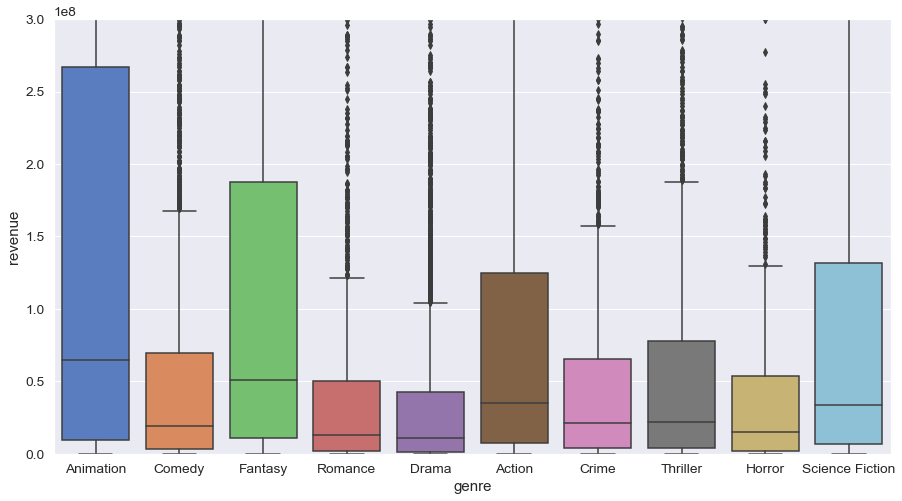

In [113]:
plt.figure(figsize=(18,8))
fig,ax = plt.subplots(nrows=1,ncols=1,figsize=(15,8))
sns.boxplot(x='genre',y='revenue',data=violin_movies,palette="muted",ax=ax)
ax.set_ylim([0,3e8])
plt.show()

##### Animation movies has the largest 25-75 range as well as the median revenue among all the genres plotted. Fantasy and Science Fiction have the second and third highest median revenue respectively.

<Figure size 1296x576 with 0 Axes>

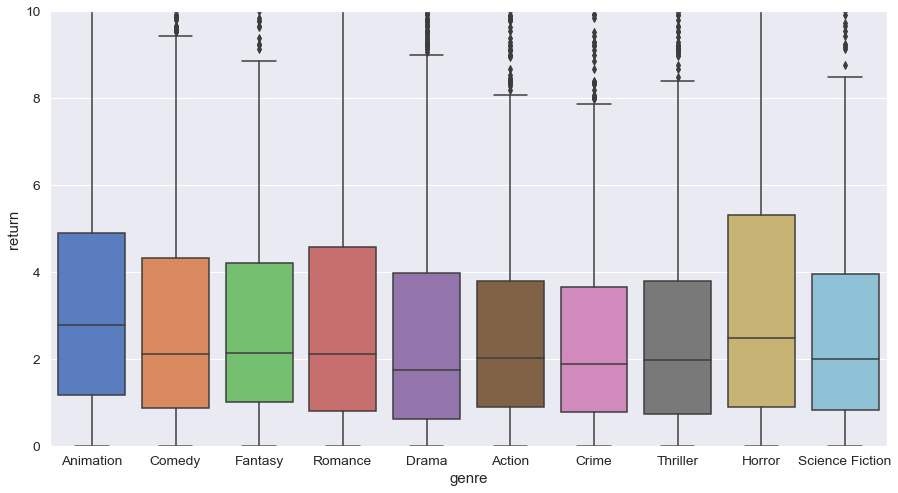

In [114]:
plt.figure(figsize=(18,8))
fig,ax = plt.subplots(nrows=1,ncols=1,figsize=(15,8))
sns.boxplot(x='genre',y='return',data=violin_movies,palette="muted",ax=ax)
ax.set_ylim([0,10])
plt.show()

##### From the boxplot, it seems like Animation Movies tend to yield the highest returns on average. Horror Movies also tend to be a good bet. This is partially due to the nature of Horror movies being low budget compared to Fantasy Movies but being capable of generating very high revenues relative to its budget.

##### Cast and Crew. Let us now take a look at the cast and crew of our movies. We do not have these details with us in our main dataset. However, we have a separate file consisting of the full cast and crew credits of all the Movielens Movies. Let us take a look at this credits data.

In [115]:
credits_df = pd.read_csv('Desktop/ML DATA/credits.csv')
credits_df.head()

,cast,crew,id
0,"[{'cast_id': 14, 'character': 'Woody (voice)',...","[{'credit_id': '52fe4284c3a36847f8024f49', 'de...",862
1,"[{'cast_id': 1, 'character': 'Alan Parrish', '...","[{'credit_id': '52fe44bfc3a36847f80a7cd1', 'de...",8844
2,"[{'cast_id': 2, 'character': 'Max Goldman', 'c...","[{'credit_id': '52fe466a9251416c75077a89', 'de...",15602
3,"[{'cast_id': 1, 'character': ""Savannah 'Vannah...","[{'credit_id': '52fe44779251416c91011acb', 'de...",31357
4,"[{'cast_id': 1, 'character': 'George Banks', '...","[{'credit_id': '52fe44959251416c75039ed7', 'de...",11862


##### cast: A stringified list of dictionaries consisting of cast names and the corresponding characters they played. 
##### crew: A stringified list of dictionaries consisting of crew names and the function they performed.
##### id: The TMDB ID of movie.

##### We need to perform a left join of our original movies metadata dataframe with the credits dataframe on the TMDB Movie ID. Before we are able to perform this join, we need to make sure that the ID column of our main dataframe is clean and of type integer. If an exception is raised then we will replace the id with NaN, and then drop these rows from our dataframe.

In [116]:
def convert_int(x):
    try:
        return int(x)
    except:
        return np.nan

In [117]:
df['id'] = df['id'].apply(convert_int)

In [122]:
df[df['id'].isnull()]

,belongs_to_collection,budget,genres,homepage,id,original_language,overview,popularity,poster_path,production_companies,...,status,tagline,title,video,vote_average,vote_count,return,year,day,month
19730,0.065736,NaN,"[Carousel Productions, Vision View Entertainme...","[{'iso_3166_1': 'CA', 'name': 'Canada'}, {'iso...",NaN,104.0,Released,NaN,<img src='http://image.tmdb.org/t/p/w185/Midni...,[],...,NaN,NaN,nan,NaN,NaN,NaN,NaN,NaN,NaN,NaN
29503,1.931659,NaN,"[Aniplex, GoHands, BROSTA TV, Mardock Scramble...","[{'iso_3166_1': 'US', 'name': 'United States o...",NaN,68.0,Released,NaN,<img src='http://image.tmdb.org/t/p/w185/Mardo...,[],...,NaN,NaN,nan,NaN,NaN,NaN,NaN,NaN,NaN,NaN
35587,2.185485,NaN,"[Odyssey Media, Pulser Productions, Rogue Stat...","[{'iso_3166_1': 'CA', 'name': 'Canada'}]",NaN,82.0,Released,NaN,<img src='http://image.tmdb.org/t/p/w185/Avala...,[],...,NaN,NaN,nan,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [123]:
df = df.drop([19730,29503,35587])

In [124]:
df['id'] = df['id'].astype('int')

In [125]:
df = df.merge(credits_df,on='id')
df.shape

(45538, 27)

In [126]:
df['cast'] = df['cast'].apply(ast.literal_eval)
df['crew'] = df['crew'].apply(ast.literal_eval)

In [127]:
df['cast'] = df['cast'].apply(lambda x:[i['name'] for i in x] if isinstance(x,list) else [])

In [128]:
def get_director(x):
    for i in x:
        if i['job'] == 'Director':
            return i['name']
    return np.nan

In [129]:
df['director'] = df['crew'].apply(get_director)

In [130]:
s = df.apply(lambda x:pd.Series(x['cast']),axis=1).stack().reset_index(level=1,drop=True)
s.name = 'actor'
cast_df = df.drop('cast',axis=1).join(s)

##### Actors with the highest total revenue

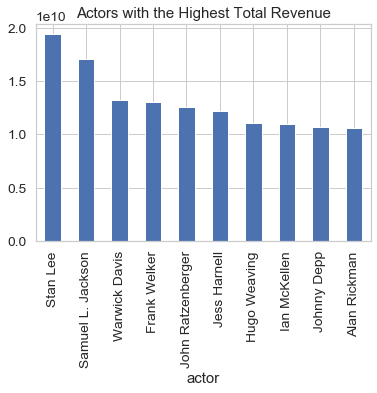

In [132]:
sns.set_style('whitegrid')
plt.title('Actors with the Highest Total Revenue')
cast_df.groupby('actor')['revenue'].sum().sort_values(ascending=False).head(10).plot(kind='bar')
plt.show()

##### Directors with the Highest Total Revenue

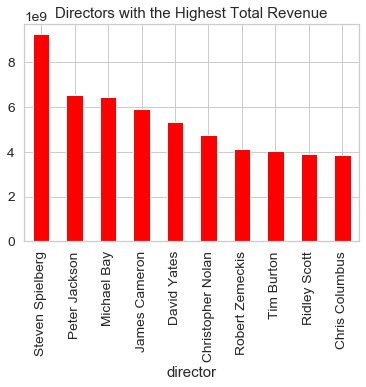

In [133]:
plt.title('Directors with the Highest Total Revenue')
df.groupby('director')['revenue'].sum().sort_values(ascending=False).head(10).plot(kind='bar',colormap='autumn')
plt.show()

##### For average revenues, we will consider only actors and directors who have acted and directed in at least 5 movies respectively.

In [134]:
actor_list = cast_df.groupby('actor')['revenue'].count().sort_values(ascending=False)
actor_list = list(actor_list[actor_list>=5].index)
director_list = cast_df.groupby('director')['revenue'].count().sort_values(ascending=False)
director_list = list(director_list[director_list>=5].index)

##### Actors with highest average revenue

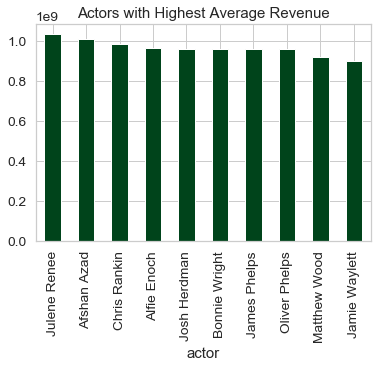

In [135]:
plt.title('Actors with Highest Average Revenue')
cast_df[cast_df['actor'].isin(actor_list)].groupby('actor')['revenue'].mean().sort_values(ascending=False).head(10).plot(kind='bar',colormap='Greens_r')
plt.show()

##### Directors with Highest Average Revenue

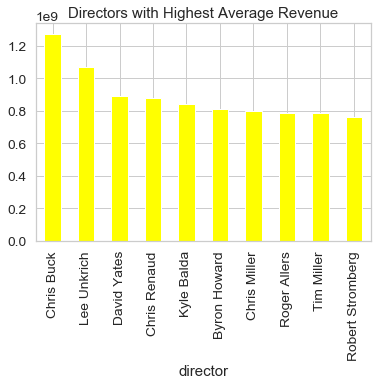

In [136]:
plt.title('Directors with Highest Average Revenue')
df[df['director'].isin(director_list)].groupby('director')['revenue'].mean().sort_values(ascending=False).head(10).plot(kind='bar',colormap='autumn_r')
plt.show()

##### Most successful actors

In [137]:
success_df = cast_df[(cast_df['return'].notnull()) & (cast_df['revenue']>1e7) & (cast_df['actor'].isin(actor_list))]
pd.DataFrame(success_df.groupby('actor')['revenue'].mean().sort_values(ascending=False).head(10))

,revenue
actor,
Ron Donachie,1.845034e+09
Jessie Cave,1.076755e+09
Julene Renee,1.034721e+09
Andy Nyman,1.020063e+09
Afshan Azad,1.012880e+09
Chris Rankin,9.846363e+08
Alfie Enoch,9.647231e+08
Devon Murray,9.634209e+08
Josh Herdman,9.634209e+08


##### Most successful directors

In [138]:
success_df = df[(df['return'].notnull()) & (df['revenue']>1e7) & (df['director'].isin(director_list))]
pd.DataFrame(success_df.groupby('director')['return'].mean().sort_values(ascending=False).head(10))

,return
director,
Marek Kanievska,1.239638e+07
Park Kwang-hyun,4.197477e+06
John G. Avildsen,1.698228e+05
Oren Peli,1.289039e+04
Daniel Myrick,4.133333e+03
Park Hoon-Jung,2.216690e+03
Bruce Lee,6.538462e+02
Morgan Spurlock,4.396166e+02
Travis Cluff,4.266441e+02


In [139]:
df[(df['director']=='John G. Avildsen') & (df['return'].notnull())][['title','budget','revenue','return','year']]

,title,budget,revenue,return,year
1853,Rocky,1000000.0,117235147.0,1.172351e+02,1976.0
2307,Rocky V,42000000.0,119946358.0,2.855866e+00,1990.0
2315,The Karate Kid,8000000.0,90815558.0,1.135194e+01,1984.0
2316,"The Karate Kid, Part II",113.0,115103979.0,1.018619e+06,1986.0
5226,Joe,106000.0,19319254.0,1.822571e+02,1970.0
5658,Neighbors,8500000.0,29916207.0,3.519554e+00,1981.0


##### We will end our Exploratory Data Analysis and Data Wrangling stage over here. Let us use some of the insights we gained in this section and build some useful predictive models.

## Regression : Predicting Movie Revenues

### In this section, I will attempt at building a regression model to predict movie revenues. Since this isn't one of the main goals of this project, I will not spend too much time feature engineering or hyperparamater tuning my model.

##### We will be using TMDB's Popularity Score and Vote Average as our features in our model to assign a numerical value to popularity. However, it must be kept in mind that these metrics will not be available when predicting movie revenues in the real world, when the movie has not been released yet.

In [140]:
rgf = df[df['return'].notnull()]
rgf.shape

(5393, 28)

##### We have 5393 records in our training set. Let us take a look at all the features and remove the unnecessary ones.

In [141]:
rgf.columns

Index(['belongs_to_collection', 'budget', 'genres', 'homepage', 'id',
       'original_language', 'overview', 'popularity', 'poster_path',
       'production_companies', 'production_countries', 'release_date',
       'revenue', 'runtime', 'spoken_languages', 'status', 'tagline', 'title',
       'video', 'vote_average', 'vote_count', 'return', 'year', 'day', 'month',
       'cast', 'crew', 'director'],
      dtype='object')

In [142]:
rgf = rgf.drop(['id','overview','poster_path','release_date','status','tagline','video','return','crew'],axis=1)

##### 1. belongs_to_collection will be turned into a Boolean variable. 1 indicates a movie is a part of collection whereas 0 indicates it is not.
##### 2. genres will be converted into number of genres.
##### 3. homepage will be converted into a Boolean variable that will indicate if a movie has a homepage or not.
##### 4. original_language will be replaced by a feature called is_foreign to denote if a particular film is in English or a Foreign Language.
##### 5. production_companies will be replaced with just the number of production companies collaborating to make the movie.
##### 6. production_countries will be replaced with the number of countries the film was shot in.
##### 7. day will be converted into a binary feature to indicate if the film was released on a Friday.
##### 8. month will be converted into a variable that indicates if the month was a holiday season.

In [143]:
s = rgf.apply(lambda x:pd.Series(x['genres']),axis=1).stack().reset_index(level=1,drop=True)
s.name = 'genre'
gen_rgf = rgf.drop('genres',axis=1).join(s)
genres_train = gen_rgf['genre'].drop_duplicates()

In [144]:
def feature_engineering(df):
    df['belongs_to_collection'] = df['belongs_to_collection'].apply(lambda x: 0 if x == np.nan else 1)
    for genre in genres_train:
        df['is_' + str(genre)] = df['genres'].apply(lambda x: 1 if genre in x else 0)
    df['genres'] = df['genres'].apply(lambda x: len(x))
    df['homepage'] = df['homepage'].apply(lambda x: 0 if x == np.nan else 1)
    df['is_english'] = df['original_language'].apply(lambda x: 1 if x=='en' else 0)
    df = df.drop('original_language',axis=1)
    df['production_companies'] = df['production_companies'].apply(lambda x: len(x))
    df['production_countries'] = df['production_countries'].apply(lambda x: len(x))
    df['is_Friday'] = df['day'].apply(lambda x: 1 if x == 'Fri' else 0)
    df = df.drop('day',axis=1)
    df['is_Holiday'] = df['month'].apply(lambda x: 1 if x in ['Apr','May','Jun','Nov'] else 0)
    df = df.drop('month',axis=1)
    df = df.drop(['title','cast','director'],axis=1)
    df = pd.get_dummies(df,prefix='is')
    df['runtime'] = df['runtime'].fillna(df['runtime'].mean())
    df['vote_average'] = df['vote_average'].fillna(df['vote_average'].mean())
    return df

In [145]:
X, y = rgf.drop('revenue',axis=1), rgf['revenue']

In [146]:
X = feature_engineering(X)

In [147]:
train_X,test_X,train_y,test_y = train_test_split(X,y,train_size=0.75,test_size=0.25)

In [148]:
X.shape

(5393, 36)

In [149]:
reg = GradientBoostingRegressor()
reg.fit(train_X,train_y)
reg.score(test_X,test_y)

0.7705531258366277

##### We get a Coefficient of Determination of 0.77 which is a pretty score for the basic model that we have built. Let us compare our model's score to a Dummy Regressor.

In [150]:
dummy = DummyRegressor()
dummy.fit(train_X,train_y)
dummy.score(test_X,test_y)

-7.362034958169339e-05

##### We see that our model performs far more superiorly than the Dummy Regressor. Finally, let us plot the feature importances in the form of a bar plot to deduce which features were the most significant in our making predictions.

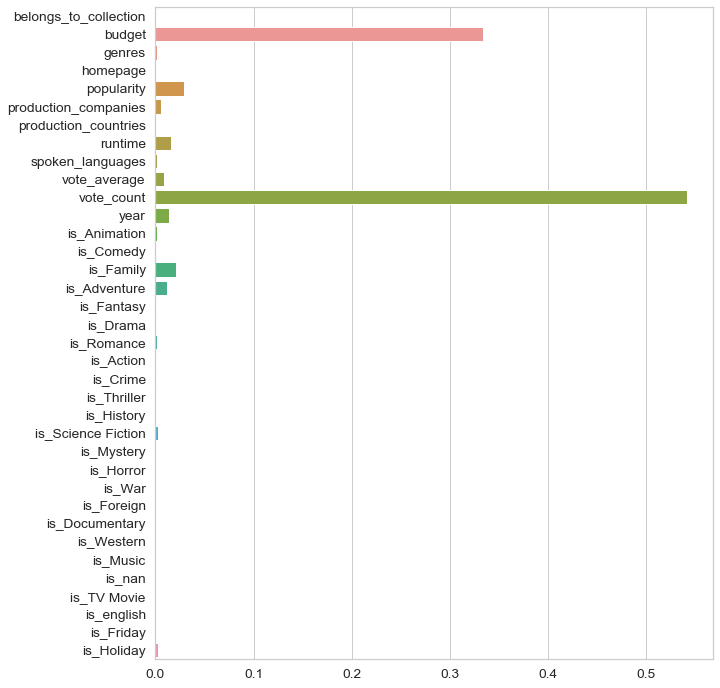

In [151]:
sns.set_style('whitegrid')
plt.figure(figsize=(10,12))
sns.barplot(x=reg.feature_importances_,y=X.columns)

##### We see that vote_count is the most important feature to our gradient boosting model. This shows the importance of popularity metrics in determining the revenue of a movie. Budget was the second most important feature followed by popularity.

## Classification : Predicting Movie Success

##### What factors influence whether a movie will be able to recoup its investments? I will try to answer this question by building a binary classifier that predicts if a movie will make a profit or a loss. We have already performed extensive analysis of our data and haven't done a lot with respect to determining factors that make a movie a success. We shall attempt at doing that in this section and follow it up by building our model.

In [152]:
cls = df[df['return'].notnull()]
cls.shape

(5393, 28)

In [153]:
cls.columns

Index(['belongs_to_collection', 'budget', 'genres', 'homepage', 'id',
       'original_language', 'overview', 'popularity', 'poster_path',
       'production_companies', 'production_countries', 'release_date',
       'revenue', 'runtime', 'spoken_languages', 'status', 'tagline', 'title',
       'video', 'vote_average', 'vote_count', 'return', 'year', 'day', 'month',
       'cast', 'crew', 'director'],
      dtype='object')

In [155]:
cls = cls.drop(['id','overview','poster_path','release_date','status','tagline','revenue'],axis=1)

##### Let us convert our return feature into a binary variable that will serve as our classes: 0 indicating a flop and 1 indicating a hit.

In [157]:
cls['return'] = cls['return'].apply(lambda x: 1 if x>=1 else 0)

In [158]:
cls['return'].value_counts()

1    3784
0    1609
Name: return, dtype: int64

In [160]:
cls['belongs_to_collection'] = cls['belongs_to_collection'].fillna('').apply(lambda x: 0 if x=='' else 1)

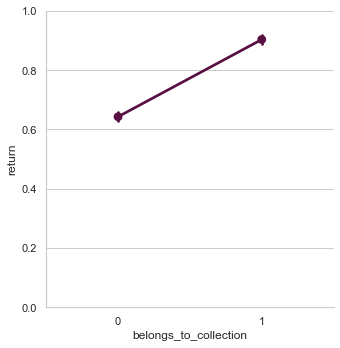

In [161]:
sns.set(style='whitegrid')
g = sns.PairGrid(data=cls,x_vars = ['belongs_to_collection'], y_vars = 'return', size=5)
g.map(sns.pointplot,color=sns.xkcd_rgb["plum"])
g.set(ylim=(0,1))

##### It seems that movies that belong to a franchise have a higher probability of being a success.

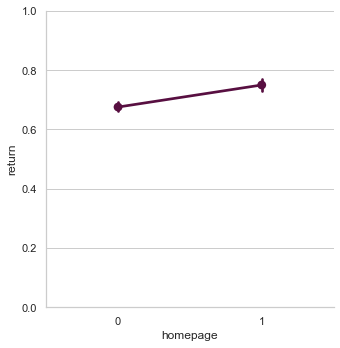

In [162]:
cls['homepage'] = cls['homepage'].fillna('').apply(lambda x: 0 if x=='' else 1)
g = sns.PairGrid(data=cls,x_vars=['homepage'],y_vars='return',size=5)
g.map(sns.pointplot,color=sns.xkcd_rgb["plum"])
g.set(ylim=(0,1))

##### We see that with homepages, there is not a very huge difference in probability. To avoid the curse of dimensionality, we will eliminate this feature as it is not very useful.

In [163]:
s = cls.apply(lambda x:pd.Series(x['genres']),axis=1).stack().reset_index(level=1,drop=True)
s.name='genre'
gen_cls = cls.drop('genres',axis=1).join(s)

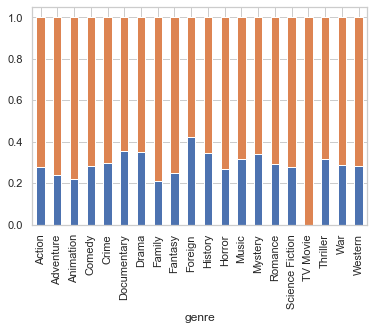

In [164]:
ctab = pd.crosstab([gen_cls['genre']],gen_cls['return'],dropna=False).apply(lambda x:x/x.sum(),axis=1)
ctab.plot(kind='bar',stacked=True,legend=False)

##### We find that TV Movies have a 0% Failure Rate but that is most probably because they are extremely few in numner. Foreign Films have a higher rate of failure than average. Since there isn't anything drastic about a particular genre, we will proceed with one hot encoding all genres.

In [165]:
cls.columns

Index(['belongs_to_collection', 'budget', 'genres', 'homepage',
       'original_language', 'popularity', 'production_companies',
       'production_countries', 'runtime', 'spoken_languages', 'title', 'video',
       'vote_average', 'vote_count', 'return', 'year', 'day', 'month', 'cast',
       'crew', 'director'],
      dtype='object')

In [166]:
def classification_engineering(df):
    for genre in genres_train:
        df['is_' + str(genre)] = df['genres'].apply(lambda x: 1 if genre in x else 0)
    df['genres'] = df['genres'].apply(lambda x: len(x))
    df = df.drop('homepage',axis=1)
    df['is_english'] = df['original_language'].apply(lambda x: 1 if x=='en' else 0)
    df = df.drop('original_language',axis=1)
    df['production_companies'] = df['production_companies'].apply(lambda x: len(x))
    df['production_countries'] = df['production_countries'].apply(lambda x: len(x))
    df['is_Friday'] = df['day'].apply(lambda x: 1 if x == 'Fri' else 0)
    df = df.drop('day',axis=1)
    df['is_Holiday'] = df['month'].apply(lambda x: 1 if x in ['Apr','May','Jun','Nov'] else 0)
    df = df.drop('month',axis=1)
    df = df.drop(['title','cast','director'],axis=1)
    df['runtime'] = df['runtime'].fillna(df['runtime'].mean())
    df['vote_average'] = df['vote_average'].fillna(df['vote_average'].mean())
    df = df.drop('crew',axis=1)
    return df

In [167]:
cls = classification_engineering(cls)

In [168]:
cls.columns

Index(['belongs_to_collection', 'budget', 'genres', 'popularity',
       'production_companies', 'production_countries', 'runtime',
       'spoken_languages', 'video', 'vote_average', 'vote_count', 'return',
       'year', 'is_Animation', 'is_Comedy', 'is_Family', 'is_Adventure',
       'is_Fantasy', 'is_Drama', 'is_Romance', 'is_Action', 'is_Crime',
       'is_Thriller', 'is_History', 'is_Science Fiction', 'is_Mystery',
       'is_Horror', 'is_War', 'is_Foreign', 'is_Documentary', 'is_Western',
       'is_Music', 'is_nan', 'is_TV Movie', 'is_english', 'is_Friday',
       'is_Holiday'],
      dtype='object')

In [169]:
X, y = cls.drop('return',axis=1), cls['return']

In [170]:
train_X,test_X,train_y,test_y = train_test_split(X,y,train_size=0.75,test_size=0.25,stratify=y)

In [173]:
clf = GradientBoostingClassifier()
clf.fit(train_X,train_y)
clf.score(test_X,test_y)

0.7894736842105263

##### Our basic Gradient Boosting Classifier has an accuracy of approximately 80%. Again, this model can be improved upon through hyperparameter tuning and more advanced feature engineering but since this is not the main objective of this project, I will skip this.

In [174]:
dummy = DummyClassifier(strategy='most_frequent')
dummy.fit(train_X,train_y)
dummy.score(test_X,test_y)

0.7020014825796886

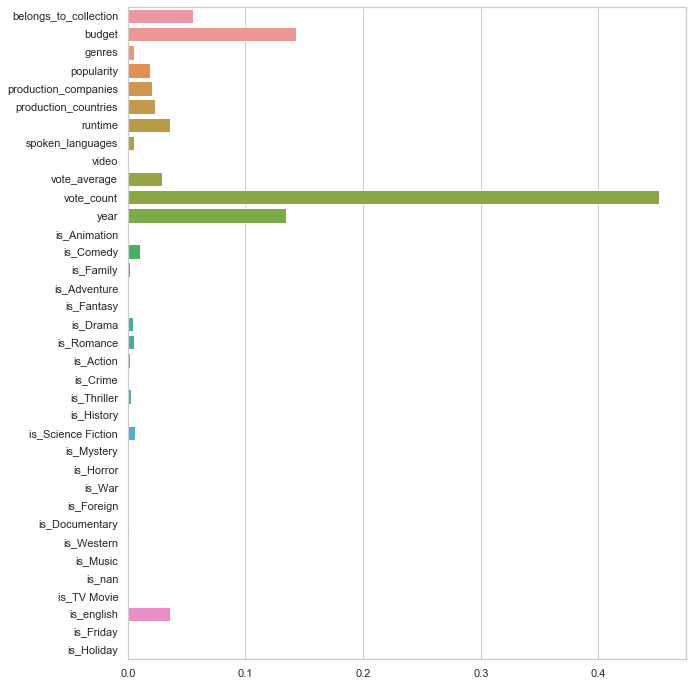

In [175]:
plt.figure(figsize=(10,12))
sns.barplot(x=clf.feature_importances_,y=X.columns)

##### We see that Vote Count is once again the most significant feature identified by our Classifier. Other important features include Budget, Popularity and Year. With this, we will conclude our discussion on the classification model and move on to the main part of the project.